In [24]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [25]:
#!pip install yfinance

In [26]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [27]:
name = 'GOOG'
name = 'BTC-USD'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1h",start="2022-05-01",end="2023-05-01")
x = df['Close']


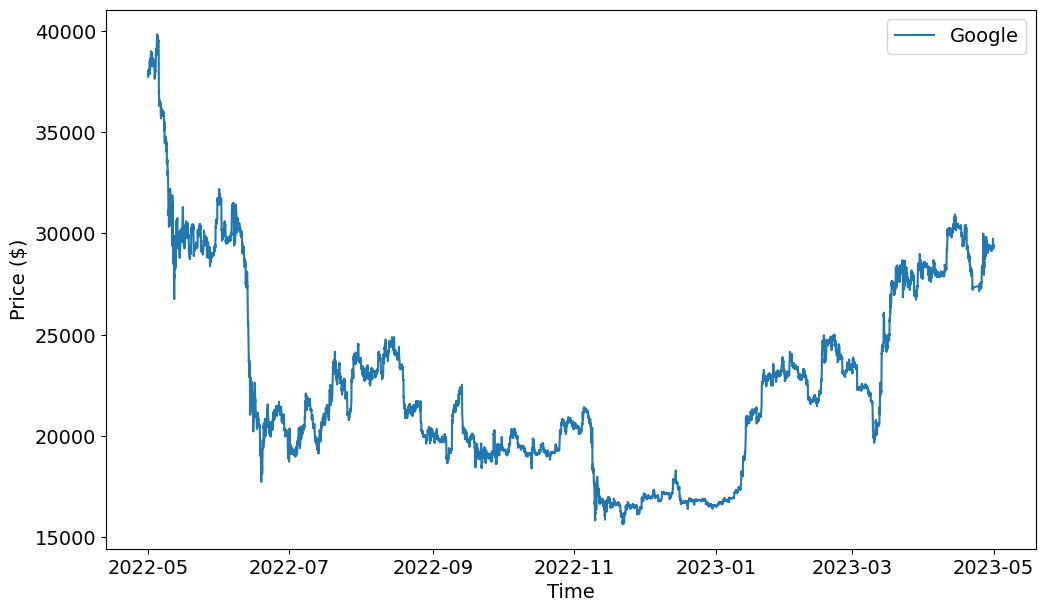

In [28]:
plt.plot(x,label="Google")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [29]:
returns = x.pct_change(1).dropna()

In [30]:
returns[0:10]

Datetime
2022-05-01 01:00:00+00:00    0.005839
2022-05-01 02:00:00+00:00   -0.002963
2022-05-01 03:00:00+00:00    0.005435
2022-05-01 04:00:00+00:00   -0.002818
2022-05-01 05:00:00+00:00    0.003670
2022-05-01 06:00:00+00:00   -0.002032
2022-05-01 07:00:00+00:00   -0.000623
2022-05-01 08:00:00+00:00    0.001920
2022-05-01 09:00:00+00:00   -0.001264
2022-05-01 10:00:00+00:00    0.001405
Name: Close, dtype: float64

In [31]:
(x[1]-x[0])/x[0]

0.005839001211217739

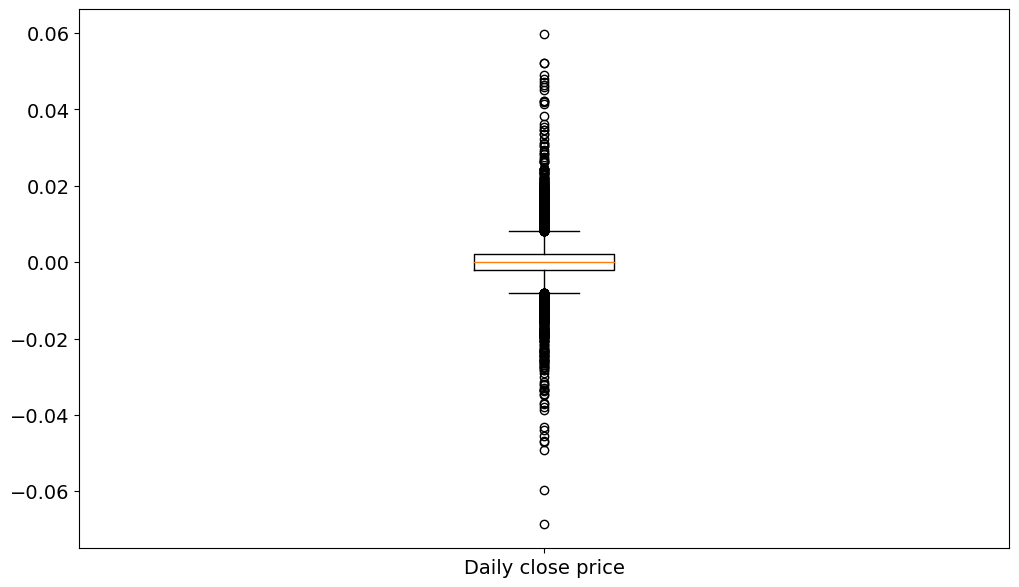

In [32]:
plt.boxplot(returns,labels=["Daily close price"])


plt.show()

In [33]:
returns.describe()

count    8705.000000
mean       -0.000010
std         0.006175
min        -0.068537
25%        -0.002019
50%         0.000010
75%         0.002022
max         0.059830
Name: Close, dtype: float64

In [34]:
np.mean(returns)

-1.0031979377113641e-05

In [35]:
np.std(returns)

0.006174347793848935

In [36]:
np.quantile(returns,0.5)

1.0352324908646793e-05

In [37]:
skew(returns)

0.040789810724662

In [38]:
skewtest(returns)

SkewtestResult(statistic=1.5543674028328025, pvalue=0.12009680409650926)

In [39]:
kurtosis(returns)

15.172158377648131

In [40]:
kurtosistest(returns)

KurtosistestResult(statistic=43.43461847122997, pvalue=0.0)

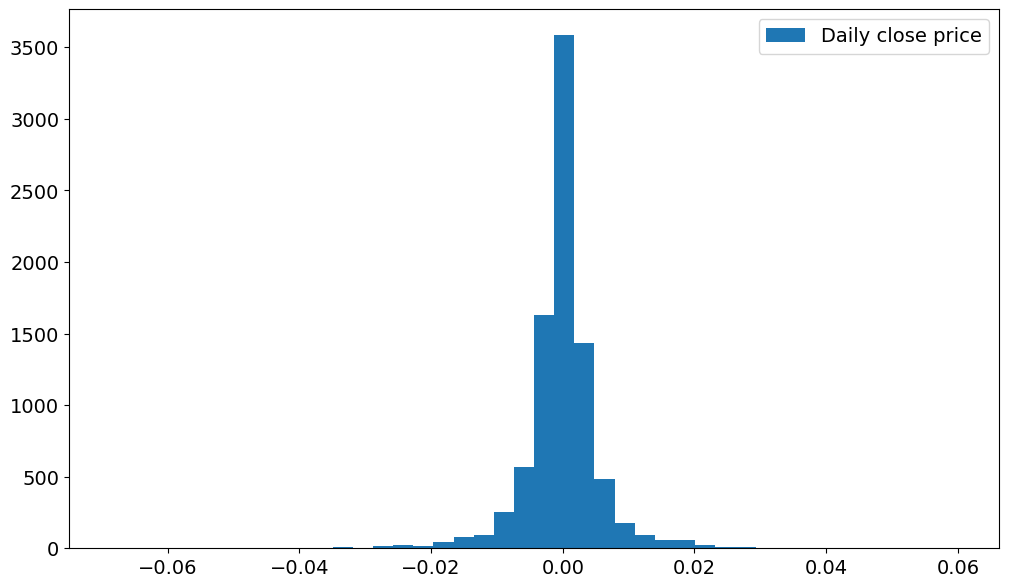

In [41]:
plt.hist(returns,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [42]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))

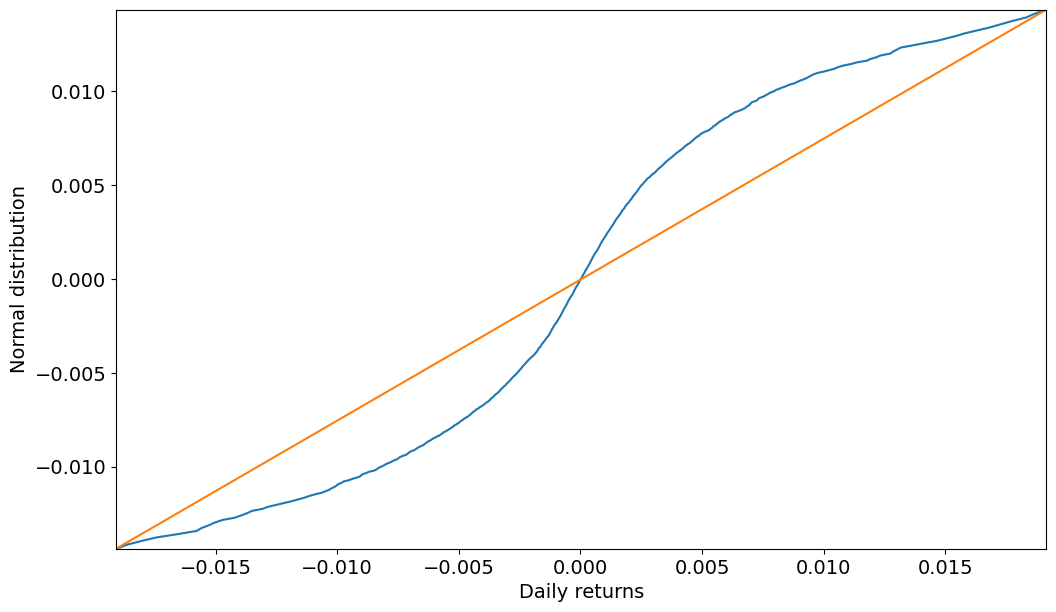

In [43]:
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

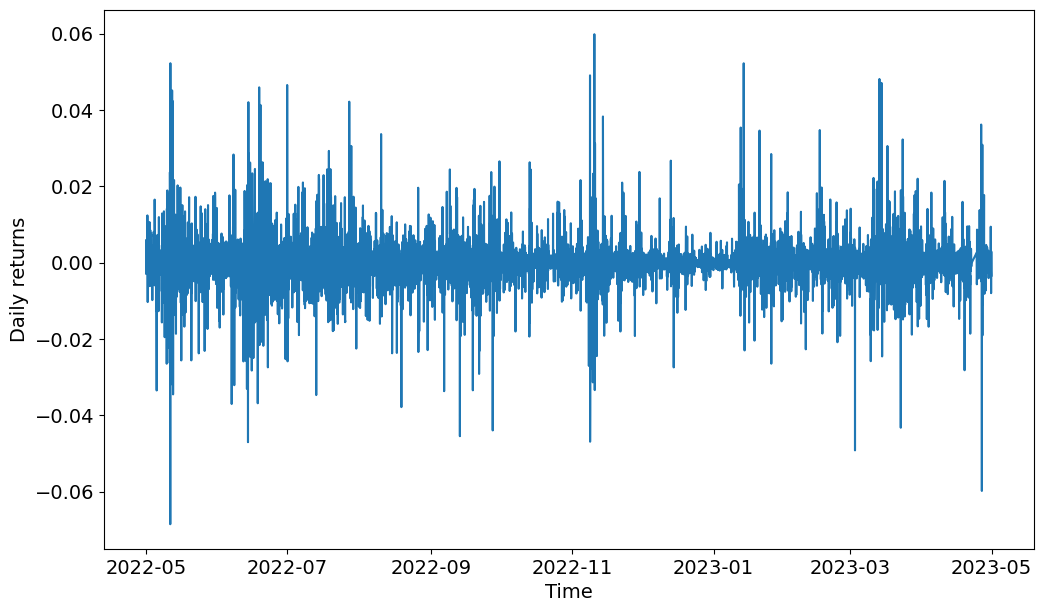

In [44]:
plt.plot(returns)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

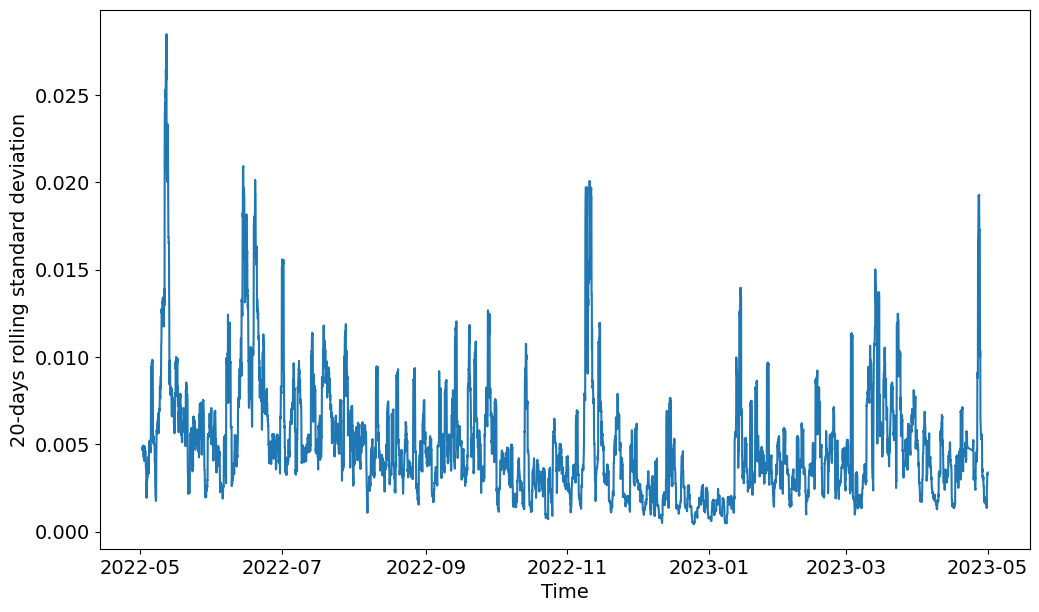

In [45]:
plt.plot(returns.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

c:\Users\Marina\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


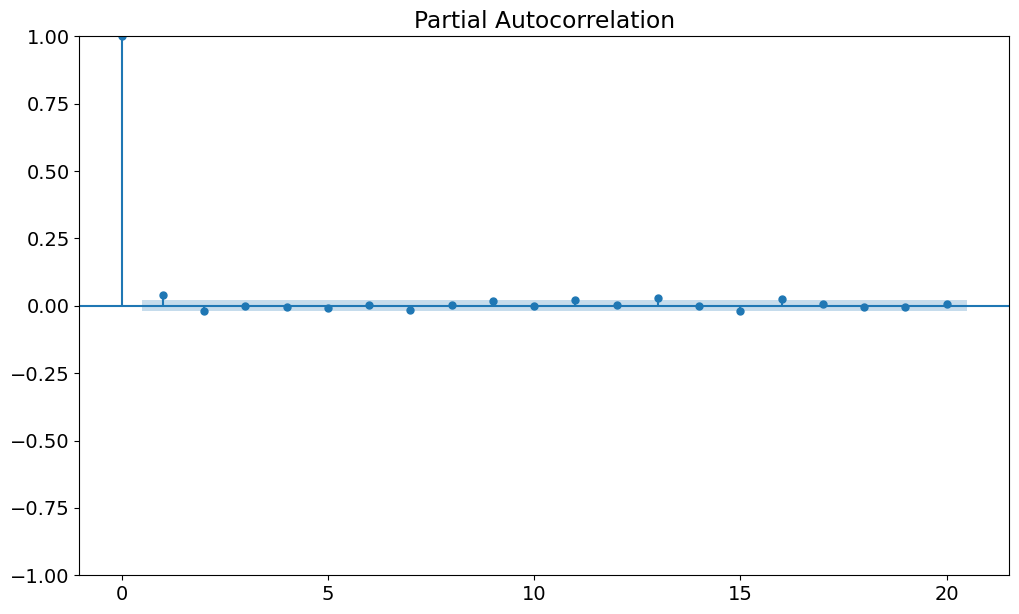

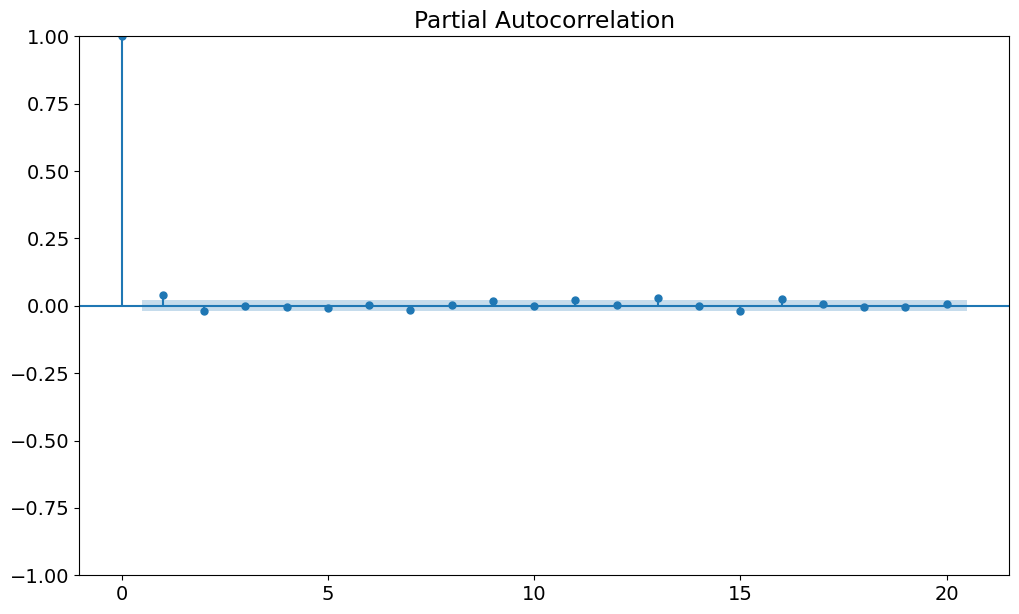

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(returns,lags=20)